In [1]:
# Import the Google Cloud client library and JSON library
from google.cloud import storage
import json
import numpy as np
import pandas as pd

In [2]:
def get_data(filepath):

    filepath_split = filepath.split('/')
        
    # Instantiate a Google Cloud Storage client and specify required bucket and file
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(filepath_split[2])
    blob = bucket.blob(filepath_split[3] + "/" + filepath_split[4])

    # Download the contents of the blob as a string and then parse it using json.loads() method
    data = json.loads(blob.download_as_string(client=None))
    return data


In [3]:
def get_actor_area(data, actor_id):
    areas = np.array([])
    for frame in data['frames']:
        for actor in frame['actors']:
            if actor['category'] == 'PERSON': # and if (actor['track_id']) == actor_id:

                tl = actor['polygon']['vertices'][0]
                br = actor['polygon']['vertices'][2]
                width = br['x'] - tl['x']
                height = br['y'] - tl['y']
                area = width * height
#                 print(f" ----- Actor ID: {actor['track_id']}, {actor_id} Area: {width} x {height}: {area}")
                areas = np.append(areas,area)
    return areas


In [4]:
actor_id = 131
filepath = "gs://voxel-portal/incidents/e9c198e8-2c0c-47bf-923e-44234f6fe112_annotations.json"


In [5]:
incident_data = get_data(filepath)
actor_areas = get_actor_area(incident_data, actor_id)
print(actor_areas)

[3033.00365155 3009.12915197 2954.40183026 2936.40681063 2982.63457637
 3054.86040679 3007.64361018 4903.30831055 3049.57754994 2911.70450806
 3883.34721074 3393.01862787 3263.3216433  3290.02871602 3705.59159761
 3139.34157375 3106.68576555 3122.19197467 3288.50061387 7286.47379449
 8467.53643273 8897.60504284 8961.84667757 8503.95343684 8402.82614298
 7862.68160669]


# Hard hat
## Valid

In [6]:
incidents_df = pd.read_csv('./valid_hh_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


66.14243064864687


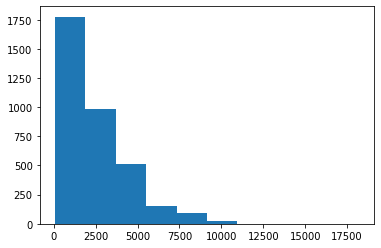

In [7]:
import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

## Invalid 

In [8]:
incidents_df = pd.read_csv('./invalid_hh_data.csv')
# incidents_df = pd.to_numeric(incidents_df)

# print(incidents_df.actor_id.astype(int))
invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.3254982209919
307.325498

654.1004176958437

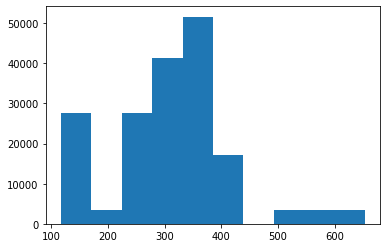

In [9]:
import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

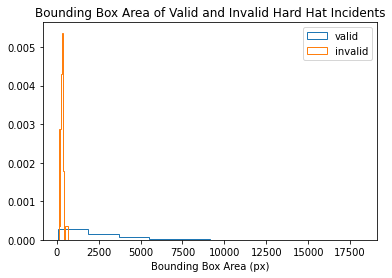

In [10]:
fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Hard Hat Incidents')
plt.show()

# Safety Vest
## Valid

In [11]:
incidents_df = pd.read_csv('./valid_sv_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


67.9329185162213


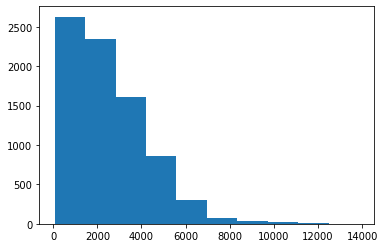

In [12]:
import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

## Invalid 

In [13]:
incidents_df = pd.read_csv('./invalid_sv_data.csv')
# incidents_df = pd.to_numeric(incidents_df)

# print(incidents_df.actor_id.astype(int))
invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.408701

765.2292733227466

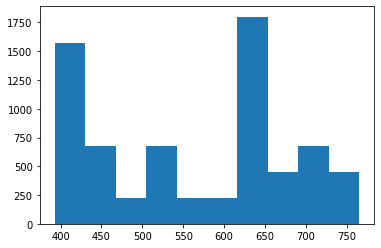

In [14]:
import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

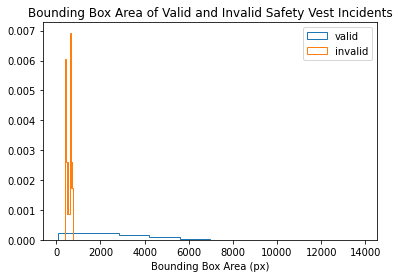

In [15]:
fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Safety Vest Incidents')
plt.show()

67.9329185162213
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014288561
562.4087014

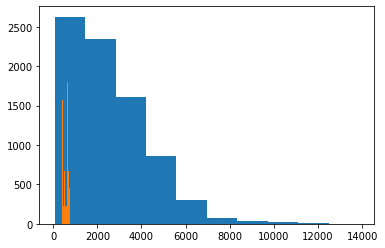

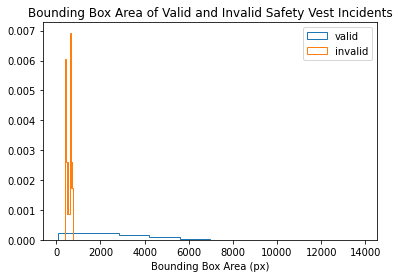

In [16]:
incidents_df = pd.read_csv('./valid_sv_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

# Invalid 

incidents_df = pd.read_csv('./invalid_sv_data.csv')
# incidents_df = pd.to_numeric(incidents_df)

# print(incidents_df.actor_id.astype(int))
invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Safety Vest Incidents')
plt.show()

# Bad Posture
## Valid

In [17]:
incidents_df = pd.read_csv('./valid_posture_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


52.43005761691197


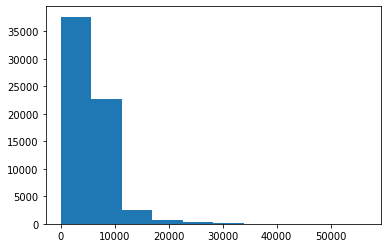

In [18]:
import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

## Invalid 

In [19]:
incidents_df = pd.read_csv('./invalid_posture_data.csv')
# incidents_df = pd.to_numeric(incidents_df)

# print(incidents_df.actor_id.astype(int))
invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.495555011

15334.305252943586

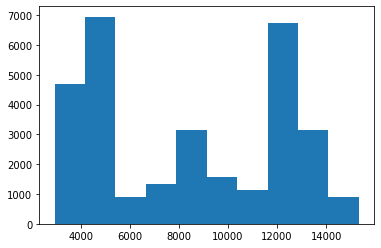

In [20]:
import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

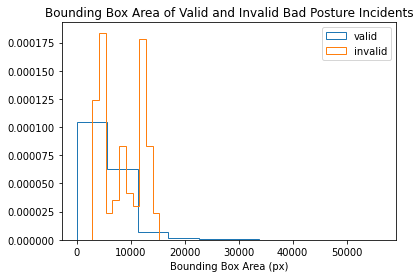

In [21]:
fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Bad Posture Incidents')
plt.show()

52.43005761691197
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501107
8444.49555501

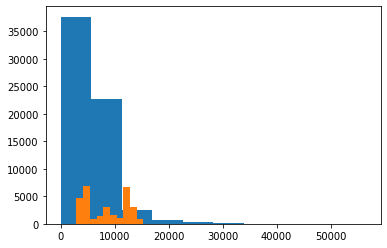

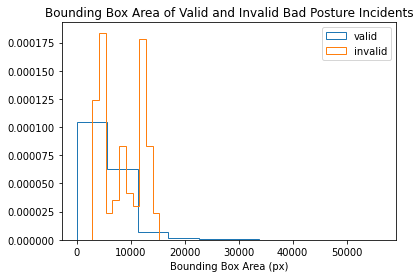

In [22]:
incidents_df = pd.read_csv('./valid_posture_data.csv')

incidents_df = pd.read_csv('./valid_posture_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

# Invalid 

incidents_df = pd.read_csv('./invalid_posture_data.csv')
# incidents_df = pd.to_numeric(incidents_df)

# print(incidents_df.actor_id.astype(int))
invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Bad Posture Incidents')
plt.show()

# Overreaching
## Valid

In [23]:
incidents_df = pd.read_csv('./valid_overreaching_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


46.98856062749836


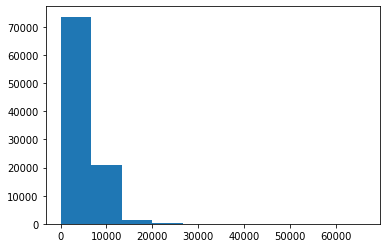

In [24]:
import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

## Invalid 

In [25]:
incidents_df = pd.read_csv('./invalid_overreaching_data.csv')

invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.23298

14192.128913741424

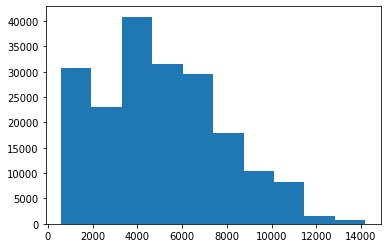

In [26]:
import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

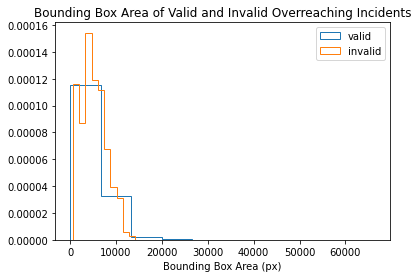

In [27]:
fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Overreaching Incidents')
plt.show()

46.98856062749836
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.232984941304
5026.23298

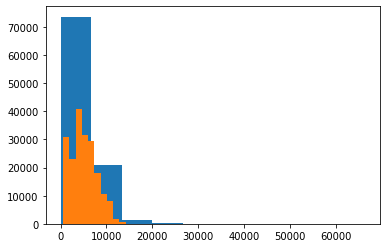

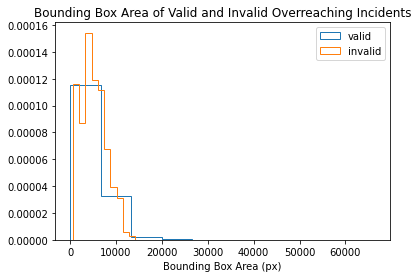

In [28]:
incidents_df = pd.read_csv('./valid_overreaching_data.csv')

areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")

    incident_data = get_data(annotation_path)
    actor_areas = get_actor_area(incident_data, actor_id)
    areas = np.append(areas, actor_areas)


import matplotlib.pyplot as plt

plt.hist(areas)

print(min(areas))

# Invalid 

incidents_df = pd.read_csv('./invalid_overreaching_data.csv')

invalid_areas = np.array([])

for index, row in incidents_df.iterrows():
    actor_id = int(row.actor_id.replace('"', ""))
    annotation_path = row.annotation_path.replace('"', "")
    actor_areas = get_actor_area(incident_data, actor_id)
    print(np.mean(actor_areas))
    invalid_areas = np.append(invalid_areas, actor_areas)



import matplotlib.pyplot as plt

plt.hist(invalid_areas)
max(invalid_areas)

fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(areas, label="valid", histtype="step", density=True) # Plot histogram of nums1
ax.hist(invalid_areas, label="invalid", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.xlabel('Bounding Box Area (px)')
plt.title('Bounding Box Area of Valid and Invalid Overreaching Incidents')
plt.show()